In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import astropy.units as u
import astropy.constants as const
from multiprocessing import Pool, Pipe, Process
import tqdm
from astropy.cosmology import Planck18 as cosmos
from astropy.cosmology import FlatLambdaCDM
# cosmos = FlatLambdaCDM(Om0=0.4, H0=60)
import astropy.coordinates as coo

In [2]:
cosmos = FlatLambdaCDM(H0=67.77, Om0=0.307115, Ob0=0.048206, Tcmb0=2.7255)

In [3]:
map_data = np.load('../catalogue/CMB_smoothed_6_shuffle.npy')   # the 6 arcsec smoothed map

In [18]:
l, b, kappa = map_data

In [ ]:
len(kappa)

kappa = -6.612e-05 std: 8.302e-01


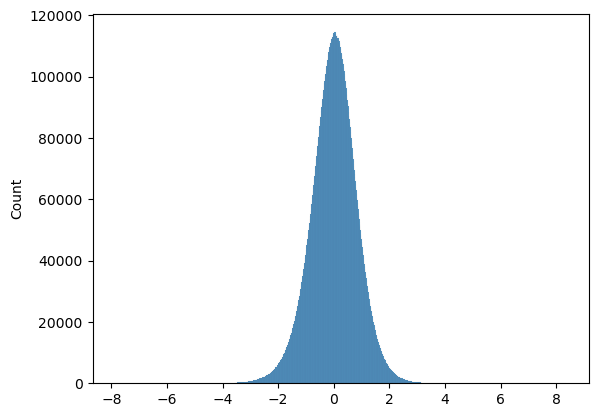

In [28]:
sns.histplot(kappa)
print('kappa = {:.3e} std: {:.3e}'.format(np.mean(kappa), np.std(kappa)))

In [4]:
h = cosmos.h

sigma_frac = (const.c*const.c/(4*np.pi*const.G)).to(
        u.Msun*u.Mpc/u.pc/u.pc).value

z_s = 1100                                              # redshift of CMB
chi_s = cosmos.comoving_distance(z_s).to(u.Mpc).value*h   # comoving distance of CMB

z_l = 1.5

# d_A = cosmos.angular_diameter_distance(z_l).to(u.Mpc).value*h
# chi_l = d_A*(1+z_l)
chi_l = cosmos.comoving_distance(z_l).to(u.Mpc).value*h
Sigma_c = sigma_frac*chi_s/(chi_l*(chi_s-chi_l)*(1+z_l))

In [5]:
Sigma_c

322.8246260265583

In [23]:
np.mean(kappa)*Sigma_c

-0.023169095243250327